Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. 
The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

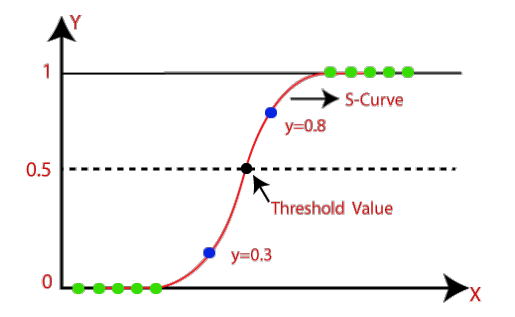

In [1]:
import matplotlib.pyplot as plt
image = plt.imread('LR.png')
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [2]:
# ! pip install sidetable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
import sidetable
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("titanic_train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# total no of records
df.shape

(891, 12)

In [6]:
df.info()
# it shows there are missing values in Age and Cabin 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df["Survived"].unique() # 0-died 1-lived

array([0, 1], dtype=int64)

In [8]:
train=df

In [9]:
# Passenger Id : Unique Id given to Passenger
# Survied      : Whether the passenge its Lived or died 0-died 1-lived
# P Class      : Ticket Class 
# Name         : Name of the Passenger
# Sex          : Passenger Gender
# Age          : Age of the Pssenger
# SibSp        : siblings of the passenger
# Parch        : parents / children aboard the Titanic 0/1/2 
#                tParch is the feature contained the number of parents or children each passenger was touring with
# Ticket       : Ticket Id
# Fare         : Fare of the Ticket
# Cabin        :
# Embarked     : Port of Embarkation (Embarked implies where the traveler mounted from)    C : Cherbourg, Q : Queenstown, S : Southampton

In [10]:
df.stb.missing()

,missing,total,percent
Cabin,687,891,77.104377
Age,177,891,19.865320
Embarked,2,891,0.224467
PassengerId,0,891,0.000000
Survived,0,891,0.000000
Pclass,0,891,0.000000
Name,0,891,0.000000
Sex,0,891,0.000000
SibSp,0,891,0.000000
Parch,0,891,0.000000


In [11]:
df.stb.freq(['Sex','Survived'])

,Sex,Survived,count,percent,cumulative_count,cumulative_percent
0,male,0,468,52.525253,468,52.525253
1,female,1,233,26.150393,701,78.675645
2,male,1,109,12.233446,810,90.909091
3,female,0,81,9.090909,891,100.000000


## Droping Irrelevant Features

In [12]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True) # Removing as of no importance
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## checking Null values

In [13]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

## Replacing Null Values in "Age" with mean value of "Age"

In [14]:
train.fillna(value={"Age" : train["Age"].mean()},inplace=True)

In [15]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [16]:
train.fillna(value={"Embarked": train["Embarked"].mode()[0]},inplace=True)

In [17]:
#train["Embarked"].mode()[0]
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

## Dropping the rows containing Null Values

In [18]:
train.dropna(inplace=True)

In [19]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

## Transformation into a categorical column

In [20]:
train.info()
# We have already noticed from the table, there are two columns that contain string-type values: 
# The “Sex” column and the “Embarked” column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
# Let’s convert that into integer type values, and transform it into a categorical column:
Sex = pd.get_dummies(train['Sex'])
Embarked=pd.get_dummies(train['Embarked'])

In [22]:
Sex.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
Embarked.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
# let concat with our original dataset
train=pd.concat([train,Sex,Embarked],axis=1)
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


## Now it’s time to begin implementing machine learning.

In [25]:
X=train[["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S"]]
Y=train["Survived"]

In [26]:
# Now, we will be splitting the data into four variables, namely, X_train, Y_train, X_test, Y_test.
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,random_state=42,test_size=0.20)

# X_train: contains a set of values from variable ‘ X ‘
# Y_train: contains the output (whether the person is alive or dead) of the corresponding value of X_train.
# X_test: contains a set of values from variable ‘ X ‘, excluding the ones from X_train.
# Y_train: contains the output (whether the person is alive or dead) of the corresponding value of X_test.

In [27]:
print(f"The Shape of X_train: {X_train.shape}")
print(f"The Shape of X_test: {X_test.shape}")
print(f"The Shape of Y_train: {Y_train.shape}")
print(f"The Shape of Y_test: {Y_test.shape}")

The Shape of X_train: (712, 10)
The Shape of X_test: (179, 10)
The Shape of Y_train: (712,)
The Shape of Y_test: (179,)


## Logistic Regression :

In [28]:
model=LogisticRegression()

In [29]:
# Now let us train the model, with our training values(X_train , Y_train)
LR = model.fit(X_train, Y_train)

# Getting Probabilities and Predictions from X_test

In [30]:
X_train_prediction = model.predict(X_train)

In [31]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.800561797752809


In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7988826815642458


In [33]:
# Checking for a Random Person:
X_test
input_data =(3,28,0,0,10.5,0,1,1,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_as_numpy_array=input_data_as_numpy_array.reshape(1,-1)
input_data_as_numpy_array

array([[ 3. , 28. ,  0. ,  0. , 10.5,  0. ,  1. ,  1. ,  0. ,  0. ]])

In [34]:
prediction = model.predict(input_data_as_numpy_array)

In [35]:
prediction

array([0], dtype=int64)

In [36]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob[5]

array([0.07148762, 0.92851238])

## Generating Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, X_test_prediction)
conf_mat

array([[89, 16],
       [20, 54]], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

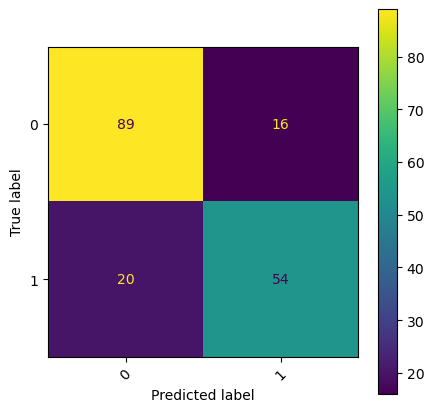

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [40]:
Accuracy = accuracy_score(Y_test, X_test_prediction).round(3)
Precision = precision_score(Y_test, X_test_prediction).round(3)   # macro calculate the average value of classes.
Recall = recall_score(Y_test, X_test_prediction).round(3)
F1_Score = f1_score(Y_test, X_test_prediction).round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")

Accuracy :  0.799
 
Precision :  0.771
 
Recall :  0.73
 
F1_Score :  0.75
 
